##SAI SRIKANTH SARABU
##CWID : A20343781

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
training_dataPath= '/content/drive/MyDrive/Sample Data/Prj 4/training_dataset.csv' #paths of training and test data set
testing_dataPath = '/content/drive/MyDrive/Sample Data/Prj 4/test_dataset.csv'

In [4]:
usrIdMax = -np.inf                        #initilizing usrIdMax with negative inifinity to store max user ID
movIdMax = -np.inf                        #initilizing movIdMax with negative inifinity to store max movie ID                        
usrAvgDict = defaultdict(list)            #default dictionary to store avg rating of each user
moviesSet = set()                         #All movies set
usersSet = set()                          #All users set
with open(training_dataPath) as f:        
  next(f)                                           
  for line in f:                          #reading each line from training csv file
    lis = line.split(',')                 
    usr = int(lis[0])                     #converting string to int and reading user id         
    mov = int(lis[1])                     #converting string to int and reading movie id
    rat = int(lis[2])                     #converting string to int and reading rating 
    if usr > usrIdMax:                    #checking for max user id
      usrIdMax = usr                      #here we get max user Id upon completion of complete iteration
    if mov > movIdMax:                    #checking for max user id  
      movIdMax = mov                      #here we get max Movie Id upon completion of complete iteration
    moviesSet.add(mov)                    #adding all the user ids to the set
    usersSet.add(usr)                     #adding all the movie ids to the set
    if usr not in usrAvgDict.keys():      #below loop is creating a dictionary of user id and the list as value which contains sum of all the ratings and no. of ratings, 
      usrAvgDict[usr].append(rat)         #appending rating to the list of dictionary value for first time occurance 
      usrAvgDict[usr].append(1)           #here I am appending the count of no of movies
    else:
      usrAvgDict[usr][0] += rat           #here we are adding all the movies rated by the same user
      usrAvgDict[usr][1] += 1             #incrementing the count

for i in usrAvgDict.keys():              #below loop is taking taking average of each user rating and changing the value of dictionary
  usrAvgDict[i] = usrAvgDict[i][0]/usrAvgDict[i][1] 

In [5]:
k = 25                #initializing no. of factors for P and Q matrices
𝜇 = 0.002             #initializing learning rate
𝜆 = 0.1               #iinitializing regularization parameter
I = 40                #no. of Iterations
P = np.random.uniform(low=0, high=np.sqrt(5/k), size=(usrIdMax+1,k))       #initializing P with random values between 0 and √5/k with size of no. of users and no. of factors
Q = np.random.uniform(low=0, high=np.sqrt(5/k), size=(movIdMax+1,k))       #initializing Q with random values between 0 and √5/k with size of no. of movies and no. of factors
ErrFuncList = []                                                           #Empty error function list

#Below function is calculating the error for rating in after each iteration with regularization
def getError():
  errValue = 0                                             #initializing error value as 0
  with open(training_dataPath) as f:                                      
    next(f)                                                #ignoring first line       
    for line in f:                                         #reading line by line from file
      lis = line.split(',')                                               
      usr = int(lis[0])                                    #converting string to int and reading user id 
      mov = int(lis[1])                                    #converting string to int and reading movie id 
      rat = int(lis[2])                                    #converting string to int and reading rating
      errValue += pow((rat-np.dot(P[usr], Q[mov])),2)      #getting square of rating - qi*pu the first tern of the error equation
  usersNorm = 0                                            
  for i in range(len(moviesSet)):                         #below loop is to get L2 Norm of the all the Users
    usersNorm +=pow(norm(Q[i]),2)
  mvsNorm = 0
  for i in range(len(usersSet)):                        #below loop is to get L2 Norm of the all the Movies
    mvsNorm +=pow(norm(P[i]),2)
  return errValue + 𝜆*(usersNorm+mvsNorm)                #adding error value and regularization to get final error and returning it



for i in range(I):                              #iterating for 40 times
  with open(training_dataPath) as f:  
    next(f)                                         
    for line in f:
      lis = line.split(',') 
      usr = int(lis[0])                              
      mov = int(lis[1])                              
      rat = int(lis[2]) 
      𝜀 = 2*(rat - np.dot(P[usr], Q[mov]))      #calculating error derivative value
      Q[mov] += 𝜇*(𝜀*P[usr] - 𝜆*Q[mov])         #updating the Qmovie value in the the Q matrix 
      P[usr] += 𝜇*(𝜀*Q[mov] - 𝜆*P[usr])         #updating the Puser value in the the P matrix
    ErrFuncList.append(getError())              #calling getError() to get the error for that particular iteration and appending it to the list


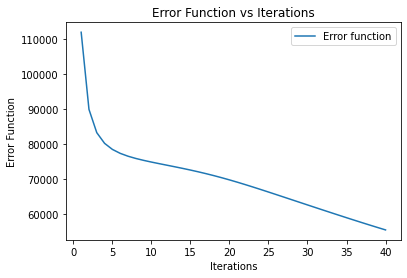

In [6]:
#plotting the graph between error function and iterations
x = [i+1 for i in range(I)]
plt.plot(x, ErrFuncList, label="Error function");
plt.title("Error Function vs Iterations");
plt.xlabel("Iterations"); 
plt.ylabel("Error Function");
plt.legend(loc=0);

In [7]:
#RMSE function given
from sklearn.metrics import mean_squared_error
from math import sqrt
def RMSE(y_actual, y_predicted):
  rms = sqrt(mean_squared_error(y_actual, y_predicted))
  return round(rms,4)

In [8]:
#here we are geting all new movie ratings as average user rating
predRatings = []                    #list to store predicted ratings
actRatings = []                     #list to store actuall ratings
with open(testing_dataPath) as f:
  next(f)                                          
  for line in f:
    lis = line.split(',') 
    usr = int(lis[0])                              
    mov = int(lis[1])                              
    rat = int(lis[2])
    actRatings.append(rat)                      #appending actual rating values to the list
    if mov not in moviesSet:                    #here I am checking whether the movie is present in training data
      predRatings.append(usrAvgDict[usr])       #appending the average user rating to the prediction list
    else:
      predRatings.append(np.dot(P[usr],Q[mov])) #appending the rating obtained by dor product of Puser and Qmovie after 40 iterations

RMSE(actRatings,predRatings)    #RMSE from Latent factors and average user artings for new movies

0.9183

In [9]:
#getting all the new movie ratings from P and Q
predRatingsLF = []                    #list to store predicted ratings
actRatings = []                     #list to store actuall ratings
with open(testing_dataPath) as f:
  next(f)                                          
  for line in f:
    lis = line.split(',') 
    usr = int(lis[0])                              
    mov = int(lis[1])                              
    rat = int(lis[2])
    actRatings.append(rat)                      #appending actual rating values to the list
    predRatingsLF.append(np.dot(P[usr],Q[mov])) #appending the rating obtained by dor product of Puser and Qmovie after 40 iterations

RMSE(actRatings,predRatingsLF)      #RMSE completely from Latent factors

0.9184

**Comparision of Collaborative filtering and Latent factors**

Comparing the result with collaborative filtering which has RMSE of 1.0984, and latent factor of 0.92, both the models are different in achieving the result, collaborative filtering model completley takes result from users and movies rating where as Latent factor with stocastic gradient decent randomly take a point on the graph and finds the error with actual rating and updating its P and Q matrices based on error to acheive optimized result with the help of learning rate, regularization parameter.